## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Implement min-max scaling, mean-normalization, log normalization and unit vector normalization in python
* Identify appropriate normalization and scaling techniques for given dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables and deleted the "NOX" (nitride oxide concentration) variable because it was highly correlated with two other features.

In [80]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix="TAX")
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD")
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop("NOX",axis=1)

## Look at the histograms for the continuous variables

In [81]:
boston_features.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(0, 3]","RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(0, 250]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
0,0.00632,18.0,2.31,0.0,6.575,65.2,4.0900,15.3,396.90,4.98,1,0,0,0,0,1,0,0,0
1,0.02731,0.0,7.07,0.0,6.421,78.9,4.9671,17.8,396.90,9.14,1,0,0,0,1,0,0,0,0
2,0.02729,0.0,7.07,0.0,7.185,61.1,4.9671,17.8,392.83,4.03,1,0,0,0,1,0,0,0,0
3,0.03237,0.0,2.18,0.0,6.998,45.8,6.0622,18.7,394.63,2.94,1,0,0,0,1,0,0,0,0
4,0.06905,0.0,2.18,0.0,7.147,54.2,6.0622,18.7,396.90,5.33,1,0,0,0,1,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bf80a90>,
      dtype=object)

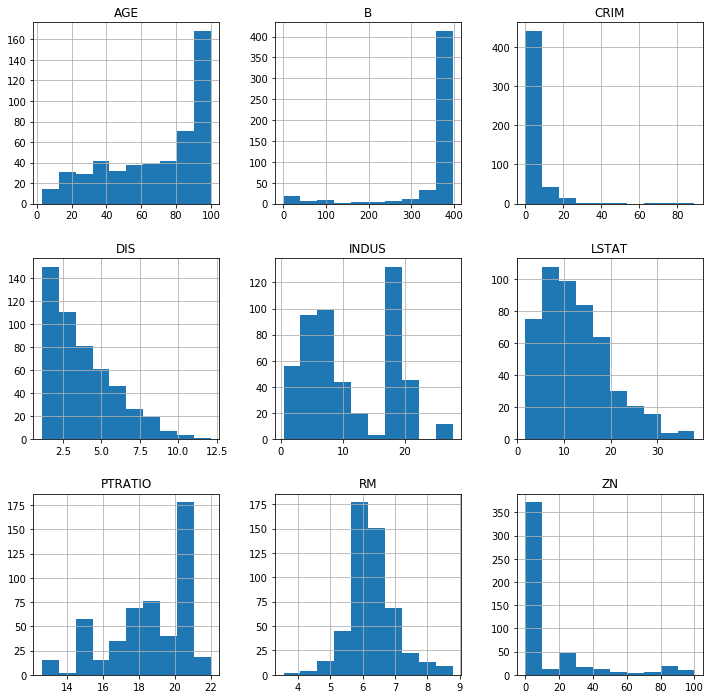

In [82]:
boston=boston_features.iloc[:,0:10]
boston=pd.DataFrame(boston)
boston=boston.drop('CHAS', axis=1)

boston.hist(figsize=[12,12])


## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the "ZN" variable?  

In [83]:
import numpy as np
boston_log=pd.DataFrame([])
boston_log['b']=np.log(boston['B'])
boston_log['crim']=np.log(boston['CRIM'])
boston_log['indus']=np.log(boston['INDUS'])
boston_log['age']=np.log(boston['AGE'])
boston_log['ptratio']=np.log(boston['PTRATIO'])
boston_log['lstat']=np.log(boston['LSTAT'])
boston_log['dis']=np.log(boston['DIS'])






array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a246f48d0>,
      dtype=object)

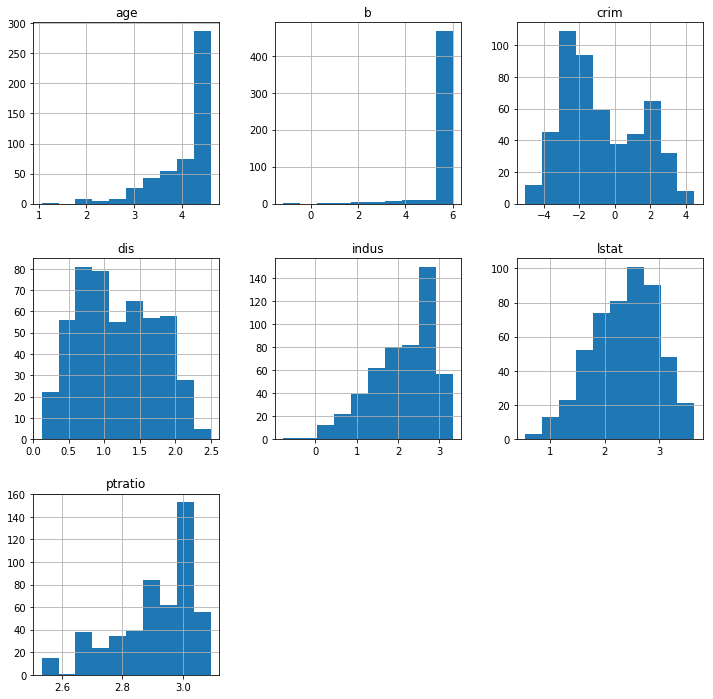

In [196]:
boston.keys()

boston_log.hist(figsize=[12,12])

In [85]:
boston['ZN'].head()

0    18.0
1     0.0
2     0.0
3     0.0
4     0.0
Name: ZN, dtype: float64

In [86]:
#B AND AGE did not improve much after log transformation. 
#zn variable has a large number of zero value. 

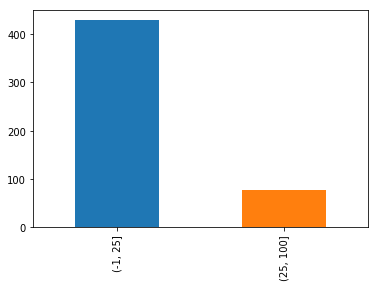

In [87]:
bins=[-1, 25, 100]
# use pd.cut
bins_zn = pd.cut(boston['ZN'], bins)
bins_zn = bins_zn.cat.as_unordered()
bins_zn.head()

bins_zn.value_counts().plot(kind='bar')

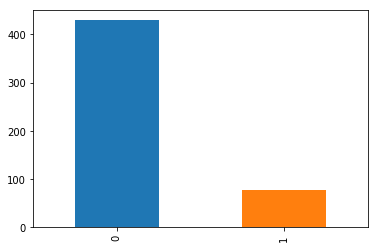

In [88]:
bins_zn = bins_zn.astype('category')
bins_zn=bins_zn.cat.codes
bins_zn.value_counts().plot(kind='bar')

In [109]:
bins_zn.head()

0    0
1    0
2    0
3    0
4    0
dtype: int8

"ZN" has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

## Try different types of transformations on the continuous variables

Store your final features in a dataframe `features_final`

In [186]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale



(array([ 18.,   6.,  10.,   2.,   3.,   3.,   7.,  11.,  33., 413.]),
 array([3.50859467e-03, 4.38333118e-01, 8.73157642e-01, 1.30798217e+00,
        1.74280669e+00, 2.17763121e+00, 2.61245574e+00, 3.04728026e+00,
        3.48210478e+00, 3.91692931e+00, 4.35175383e+00]),
 <a list of 10 Patch objects>)

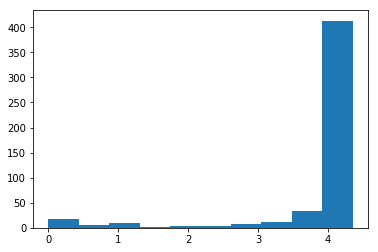

In [146]:
standardized_b=scale(b,axis=0, with_mean=0, with_std=1)
plt.hist(standardized_b)

(array([  2.,   4.,  14.,  45., 177., 151.,  69.,  22.,  13.,   9.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

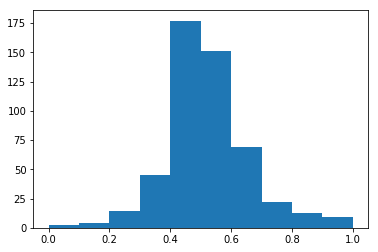

In [147]:
RM = boston['RM']
RM_matrix=RM.values.reshape(-1,1)
scaled = preprocessing.MinMaxScaler()
scaled_RM = scaled.fit_transform (RM_matrix)

plt.hist(scaled_RM)

In [190]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()




In [194]:

features_final['B']=scaled.fit_transform (boston['B'].values.reshape(-1,1))
features_final['RM']=scaled_RM
features_final['CRIM'] = scaled.fit_transform (boston_log['crim'].values.reshape(-1,1))
features_final['LSTAT']=scaled.fit_transform (boston_log['lstat'].values.reshape(-1,1))
features_final['DIS']=scaled.fit_transform (boston_log['dis'].values.reshape(-1,1))
features_final['AGE']=scaled.fit_transform (boston_log['age'].values.reshape(-1,1))
features_final['INDUS']=scaled.fit_transform (boston_log['indus'].values.reshape(-1,1))
features_final['PTRATIO']=scaled.fit_transform (boston_log['ptratio'].values.reshape(-1,1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2433d9e8>,
      dtype=object)

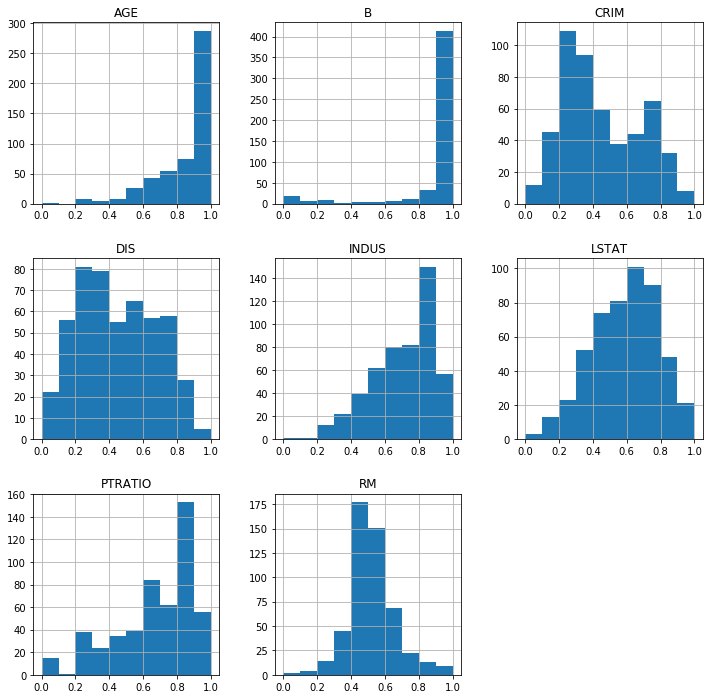

In [195]:
features_final.hist(figsize=[12,12])

In [ ]:
# for b and age, scaling and log transformation did not help much. we might need to drop them
#crime, dist and lsat improved well after log trans and scaling.
#PTRATIO AND INDUS IMPROVED JUST A LITTLE BIT. 


## Summary
Great! You've now transformed your final data using feature scaling and normalization, and stored them in the `features_final` dataframe.